In [1]:
import yfinance as yf
import numpy as np
import pandas as pd

In [2]:
stocks = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0].Symbol

In [3]:
stocks.head()

0     MMM
1     AOS
2     ABT
3    ABBV
4     ACN
Name: Symbol, dtype: object

In [4]:
stocks = stocks.to_list()

In [5]:
df = yf.download(stocks,start='2018-1-1')['Close']

[*********************100%***********************]  503 of 503 completed

3 Failed downloads:
- BF.B: No data found for this date range, symbol may be delisted
- BRK.B: No timezone found, symbol may be delisted
- ED: No data found for this date range, symbol may be delisted


In [6]:
df

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,67.599998,52.990002,106.089996,43.064999,98.410004,94.040001,58.790001,29.433332,153.839996,177.699997,...,164.300003,47.810001,85.029999,67.139999,68.070000,81.599998,120.446602,103.709999,50.700001,71.769997
2018-01-03,69.320000,52.340000,107.050003,43.057499,99.949997,94.389999,58.919998,29.459999,154.550003,181.039993,...,162.520004,47.490002,86.699997,66.910004,68.900002,81.529999,121.281555,105.769997,50.639999,72.099998
2018-01-04,68.800003,52.669998,111.000000,43.257500,99.379997,94.180000,58.820000,29.570000,156.380005,183.220001,...,163.399994,47.119999,86.820000,66.900002,69.360001,82.360001,121.106796,107.860001,50.849998,72.529999
2018-01-05,69.900002,52.650002,112.180000,43.750000,101.110001,95.320000,58.990002,29.453333,157.669998,185.339996,...,164.490005,46.790001,86.750000,67.839996,69.230003,82.839996,122.310677,109.540001,50.869999,73.360001
2018-01-08,70.050003,52.130001,111.389999,43.587502,99.489998,96.900002,58.820000,29.456667,158.929993,185.039993,...,162.300003,47.139999,87.139999,68.300003,69.480003,82.980003,122.543686,110.629997,50.619999,74.239998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-15,121.230003,16.650000,69.910004,186.009995,135.889999,181.889999,105.019997,70.150002,323.769989,490.910004,...,104.570000,64.320000,105.889999,38.389999,113.339996,139.199997,142.580002,284.549988,28.980000,171.429993
2023-06-16,121.129997,16.480000,69.220001,184.919998,138.639999,183.009995,106.199997,71.160004,319.540009,495.179993,...,103.730003,63.919998,105.129997,39.730000,113.440002,138.580002,144.100006,282.399994,28.629999,170.740005
2023-06-20,118.160004,16.320000,67.980003,185.009995,137.820007,184.490005,106.699997,70.790001,317.399994,485.859985,...,106.169998,63.070000,102.720001,39.220001,113.250000,135.820007,143.660004,277.549988,27.850000,168.910004


In [7]:
df.index = pd.to_datetime(df.index)

In [8]:
daily_returns_df = df.pct_change()

In [9]:
daily_returns_df #now we have a df which has daily returns instead of absolute prices

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,0.025444,-0.012266,0.009049,-0.000174,0.015649,0.003722,0.002211,0.000906,0.004615,0.018796,...,-0.010834,-0.006693,0.019640,-0.003426,0.012193,-0.000858,0.006932,0.019863,-0.001183,0.004598
2018-01-04,-0.007501,0.006305,0.036899,0.004645,-0.005703,-0.002225,-0.001697,0.003734,0.011841,0.012042,...,0.005415,-0.007791,0.001384,-0.000149,0.006676,0.010180,-0.001441,0.019760,0.004147,0.005964
2018-01-05,0.015988,-0.000380,0.010631,0.011385,0.017408,0.012104,0.002890,-0.003945,0.008249,0.011571,...,0.006671,-0.007003,-0.000806,0.014051,-0.001874,0.005828,0.009941,0.015576,0.000393,0.011444
2018-01-08,0.002146,-0.009877,-0.007042,-0.003714,-0.016022,0.016576,-0.002882,0.000113,0.007991,-0.001619,...,-0.013314,0.007480,0.004496,0.006781,0.003611,0.001690,0.001905,0.009951,-0.004914,0.011996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-15,0.015327,0.003617,-0.004131,0.011199,-0.002496,0.015861,0.017143,0.000999,0.027678,0.023732,...,0.010338,0.029285,0.006942,0.008670,0.013956,0.020902,0.004014,0.014873,0.032787,0.034893
2023-06-16,-0.000825,-0.010210,-0.009870,-0.005860,0.020237,0.006158,0.011236,0.014398,-0.013065,0.008698,...,-0.008033,-0.006219,-0.007177,0.034905,0.000882,-0.004454,0.010661,-0.007556,-0.012077,-0.004025
2023-06-20,-0.024519,-0.009709,-0.017914,0.000487,-0.005915,0.008087,0.004708,-0.005200,-0.006697,-0.018821,...,0.023523,-0.013298,-0.022924,-0.012837,-0.001675,-0.019916,-0.003053,-0.017174,-0.027244,-0.010718


In [10]:
monthly_returns = (daily_returns_df + 1).resample('M').prod()

In [11]:
monthly_returns

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-31,1.086243,1.025099,1.102743,0.971961,1.140331,1.059868,1.057323,1.029898,1.044592,1.124142,...,1.007851,0.954612,1.026697,0.905719,1.061554,1.036642,1.024665,1.187542,1.065680,1.069110
2018-02-28,0.934087,0.998711,0.976579,1.063848,1.032169,0.954751,0.970560,0.970310,1.001929,1.046906,...,1.011535,0.948291,0.867583,0.921888,1.032106,0.962052,0.914490,1.121630,1.017398,1.053825
2018-03-31,0.975361,0.957788,1.037637,0.941949,0.817146,0.905948,0.993204,0.969968,0.953357,1.033233,...,1.088716,1.050832,0.985081,0.897431,1.031376,1.046080,0.937978,1.007601,0.959250,1.032773
2018-04-30,0.982661,0.826212,0.965415,0.984980,1.020074,1.050690,0.970127,0.936207,0.985016,1.025546,...,1.021002,1.029903,1.042086,1.000596,0.947738,1.023141,1.056218,0.968676,1.038308,0.999641
2018-05-31,0.941892,1.014209,1.123810,1.130764,1.024754,0.906823,1.058490,0.979034,1.030027,1.124910,...,1.052742,0.971819,1.044887,0.870282,0.965706,0.933754,0.968221,1.138545,1.001096,1.002635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-28,0.933522,0.990087,0.951931,1.021623,1.041624,0.920691,0.920127,1.087801,0.951622,0.874737,...,1.045639,0.938927,0.947418,1.033668,0.986924,0.974332,0.972750,0.949617,0.952220,1.009124
2023-03-31,0.974431,0.923029,0.838921,1.118649,1.035543,1.029249,0.995478,0.969571,1.076295,1.189597,...,1.032666,1.044448,0.997725,1.031784,1.019971,1.038691,1.043029,1.059117,0.591268,0.996647
2023-04-30,0.978965,0.924746,1.032234,1.028987,0.948234,1.042096,1.090954,1.106085,0.980687,0.979734,...,1.021178,1.036625,1.079154,1.067464,0.991786,1.064355,1.071517,0.905755,0.930839,1.056116


In [12]:
worst_ = monthly_returns.loc['2018-1-31'].nsmallest(3) # we will get worst three performers, that is three smallest values in a particular row

In [13]:
worst_

NWL     0.835651
BBWI    0.836367
ENPH    0.846154
Name: 2018-01-31 00:00:00, dtype: float64

In [14]:
worst_.name # date nikaalna ho to

Timestamp('2018-01-31 00:00:00')

In [15]:
monthly_returns[worst_.name:][1:2]# ek mahine baad

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2018-02-28,0.934087,0.998711,0.976579,1.063848,1.032169,0.954751,0.97056,0.97031,1.001929,1.046906,...,1.011535,0.948291,0.867583,0.921888,1.032106,0.962052,0.91449,1.12163,1.017398,1.053825


In [16]:
relevant_return = monthly_returns[worst_.name:][1:2][worst_.index] #worst performer of that date(ek mahine baad)

In [17]:
relevant_return

,NWL,BBWI,ENPH
Date,,,
2018-02-28,0.971634,0.984827,1.509091


In [18]:
# horizontal mean
relevant_return.mean(axis=1)

Date
2018-02-28    1.155184
Freq: M, dtype: float64

In [19]:
# what the above output means is if you would have bought those 3 stocks in january, you would have got roughly 17% returns (1.15 - 0.98)

In [20]:
# function for the same things done above
def worst_performers(date):
    all_ = monthly_returns.loc[date]
    worst = all_.nsmallest(3)
    relevant_return = monthly_returns[worst.name:][1:2][worst.index]
    return(relevant_return).mean(axis=1).values[0]

In [23]:
worst_performers('2018-1-31')

1.1551840015313097

In [29]:
returns = []
for date in monthly_returns.index[:-1]:
    returns.append(worst_performers(date))

In [30]:
pd.Series(returns).prod()#result is roughly four times

4.377379923922327

<Axes: xlabel='Date'>

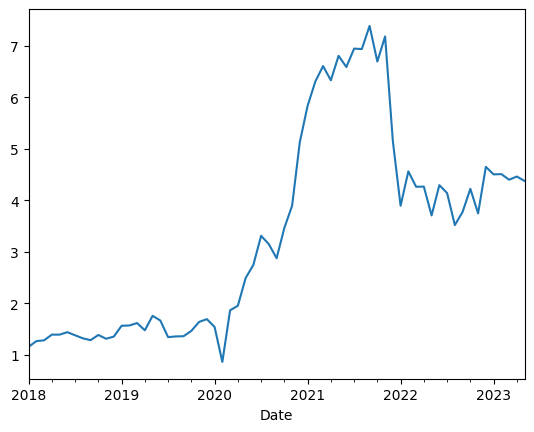

In [31]:
pd.Series(returns, index=monthly_returns.index[:-1]).cumprod().plot()
# cumprod() calculates the cumulative product of the values in the Series. 
# Each value in the resulting series is the product of all previous values, starting from the first value.

In [39]:
# Similarly you can plot for best performers

In [32]:
def best_performers(date):
    all_ = monthly_returns.loc[date]
    best = all_.nlargest(3)
    relevant_return = monthly_returns[best.name:][1:2][best.index]
    return(relevant_return).mean(axis=1).values[0]

In [33]:
best_performers('2018-1-31')

1.006468264409936

In [36]:
best_returns = []
for date in monthly_returns.index[:-1]:
    returns.append(best_performers(date))

In [37]:
pd.Series(best_returns).prod()

1